# how to control all aspects of plot(): styles, axis, titile, ticks, etc

In [1]:
import os, sys,glob

import folium
from IPython.display import display

from shapely.geometry import mapping

%matplotlib inline

import pandas as pd
import geopandas as gpd

from shapely.geometry import Point


In [2]:
def csv_latlon2points(csvfile):
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    crs = {'init': 'epsg:4283'}  # GGA94
    geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

    return geo_df

In [3]:
# path2csv='E:/Data/MT_Datasets/WenPingJiang_SHP/PhaseTensorTipper_Params_1.0986Hz.csv'
path2csv='/e/Data/GA_Works/E_Data_Modelling_Isa/EDI_edited_10Hz_1000s_SHP/phase_tensor_tipper_0.011Hz.csv'
path2dir=os.path.dirname(path2csv)
mygdf=csv_latlon2points(path2csv)

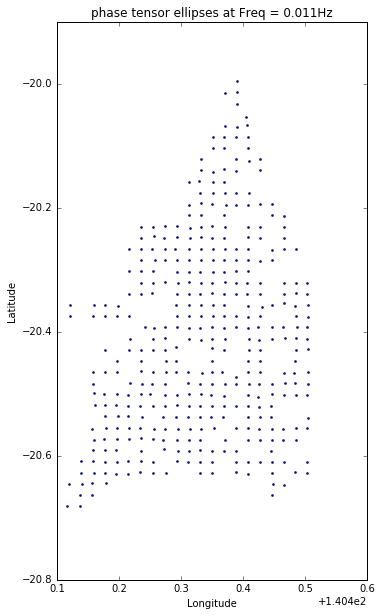

In [4]:
title_str='phase tensor ellipses at Freq = 0.011Hz'

myax = mygdf.plot(figsize=[20,10], linewidth=2.0, color='b', cmap='jet')

myax.set_xlim([140.5,141.0])
myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)


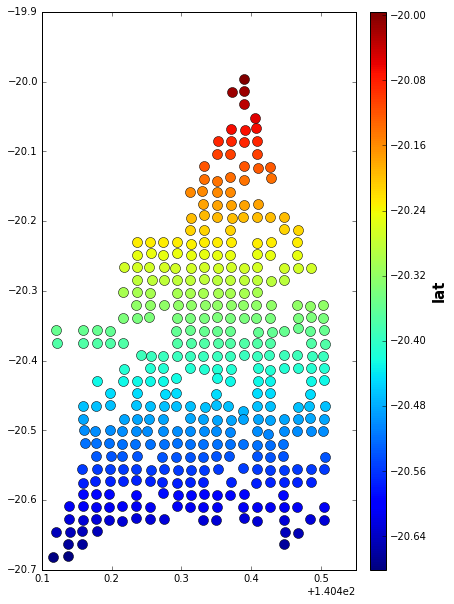

In [54]:
## the plotting

colorby='lat'
my_cmap_r= 'jet'

ax = mygdf.plot(figsize=[10,10],column=colorby, cmap=my_cmap_r,  marker='o', markersize=10)

# add colorbar
divider = make_axes_locatable(ax)
# pad = separation from figure to colorbar
cax = divider.append_axes("right", size="5%", pad=0.2)

fig = ax.get_figure()

sm = plt.cm.ScalarMappable(cmap=my_cmap_r)#, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = mygdf[colorby] #[1,2,3]

cb=fig.colorbar(sm, cax=cax, orientation='vertical')
cb.set_label(colorby, fontdict={'size': 15, 'weight': 'bold'})

In [38]:
mygdf.columns

Index([u'station', u'freq', u'lon', u'lat', u'phi_min', u'phi_max', u'azimuth',
       u'skew', u'n_skew', u'elliptic', u'tip_mag_re', u'tip_mag_im',
       u'tip_ang_re', u'tip_ang_im', u'geometry'],
      dtype='object')

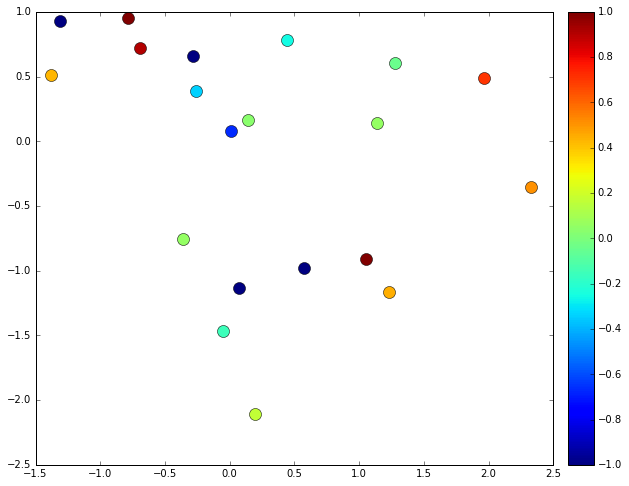

In [29]:
# http://stackoverflow.com/questions/36008648/colorbar-on-geopandas
    
## make up some random 
import shapely
import numpy as np

import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(20,3), columns=['x', 'y', 'val'])
df['geometry'] = df.apply(lambda row: shapely.geometry.Point(row.x, row.y), axis=1)
gdf = gpd.GeoDataFrame(df)

## the plotting

vmin, vmax = -1, 1

ax = gdf.plot(figsize=[10,10],column='val', cmap='jet', vmin=vmin, vmax=vmax, marker='o', markersize=12)

# add colorbar
divider = make_axes_locatable(ax)
# pad = separation from figure to colorbar
cax = divider.append_axes("right", size="5%", pad=0.2)
fig = ax.get_figure()

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

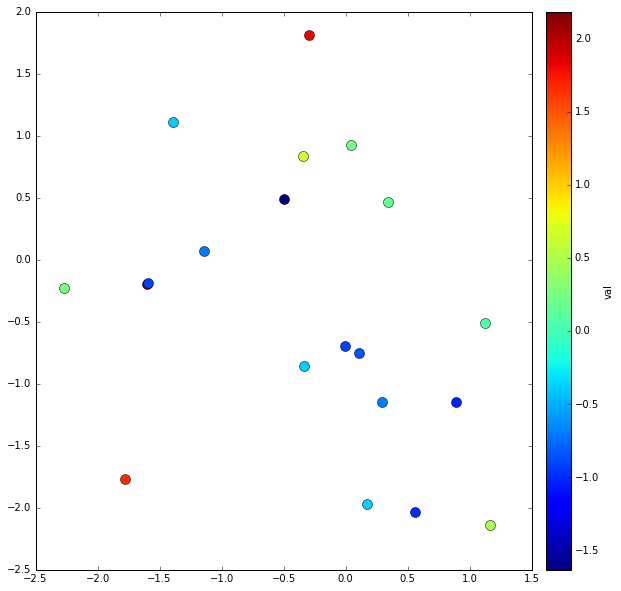

In [53]:
#http://stackoverflow.com/questions/25505674/python-matplotlib-add-colorbar
    
from mpl_toolkits.axes_grid1 import make_axes_locatable


## the plotting
my_cmap_r= 'jet'

df = pd.DataFrame(np.random.randn(20,3), columns=['x', 'y', 'val'])
df['geometry'] = df.apply(lambda row: shapely.geometry.Point(row.x, row.y), axis=1)
gdf = gpd.GeoDataFrame(df)

## the plotting

ax = gdf.plot(figsize=[10,10],column='val', cmap=my_cmap_r,  marker='o', markersize=10)

# add colorbar
divider = make_axes_locatable(ax)
# pad = separation from figure to colorbar
cax = divider.append_axes("right", size="5%", pad=0.2)

fig = ax.get_figure()

sm = plt.cm.ScalarMappable(cmap=my_cmap_r)#, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = gdf['val'] #[1,2,3]

cb=fig.colorbar(sm, cax=cax)
cb.set_label('val')


In [36]:
gdf['val'] 

0    -0.345112
1     2.348594
2    -0.362732
3     0.456114
4     0.082839
5    -0.645824
6    -0.112173
7     0.543590
8    -0.203665
9     0.098062
10   -0.705399
11    0.076896
12    0.178229
13   -0.859833
14   -1.475999
15   -1.255342
16    1.106972
17    0.865827
18    0.157955
19    2.328523
Name: val, dtype: float64

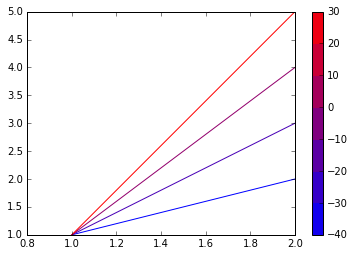

In [23]:
# Here's one way to do it while still using plt.plot(). Basically, you make a throw-away plot and get the colorbar from there.

import matplotlib as mpl
import matplotlib.pyplot as plt

min, max = (-40, 30)
step = 10

# Setting up a colormap that's a simple transtion
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])

# Using contourf to provide my colorbar info, then clearing the figure
Z = [[0,0],[0,0]]
levels = range(min,max+step,step)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()

# Plotting what I actually want
X=[[1,2],[1,2],[1,2],[1,2]]
Y=[[1,2],[1,3],[1,4],[1,5]]
Z=[-40,-20,0,30]
for x,y,z in zip(X,Y,Z):
    # setting rgb color based on z normalized to my range
    r = (float(z)-min)/(max-min)
    g = 0
    b = 1-r
    plt.plot(x,y,color=(r,g,b))
plt.colorbar(CS3) # using the colorbar info I got from contourf
plt.show()

In [6]:
matplotlib plot how to add background geotiff image (or basemap)

http://stackoverflow.com/questions/15160123/adding-a-background-image-to-a-plot-with-known-corner-coordinates
    
https://borealperspectives.wordpress.com/2016/03/07/plotting-polygon-shapefiles-on-a-matplotlib-basemap-with-geopandas-shapely-and-descartes/
    
https://ocefpaf.github.io/python4oceanographers/blog/2015/08/24/choropleth/
        

SyntaxError: invalid syntax (<ipython-input-6-d03209b5fe75>, line 1)

In [ ]:
GeoPandas: Advanced topics
https://geohackweek.github.io/vector/06-geopandas-advanced/
https://github.com/geopandas/geopandas
    